In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r'C:\Users\Chethana\Downloads\adm_data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [16]:
data=pd.DataFrame(df)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1
396,397,325,107,3,3.0,3.5,9.11,1,1
397,398,330,116,4,5.0,4.5,9.45,1,1
398,399,312,103,3,3.5,4.0,8.78,0,1


In [22]:
# Display summary statistics
print(data.describe())

        GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.535000  
std      0.596317    0.498362          0.499398  
min      6.800000    0.000000          0.000000  
25%      8.170000    0.000000          0.000000  
50%   

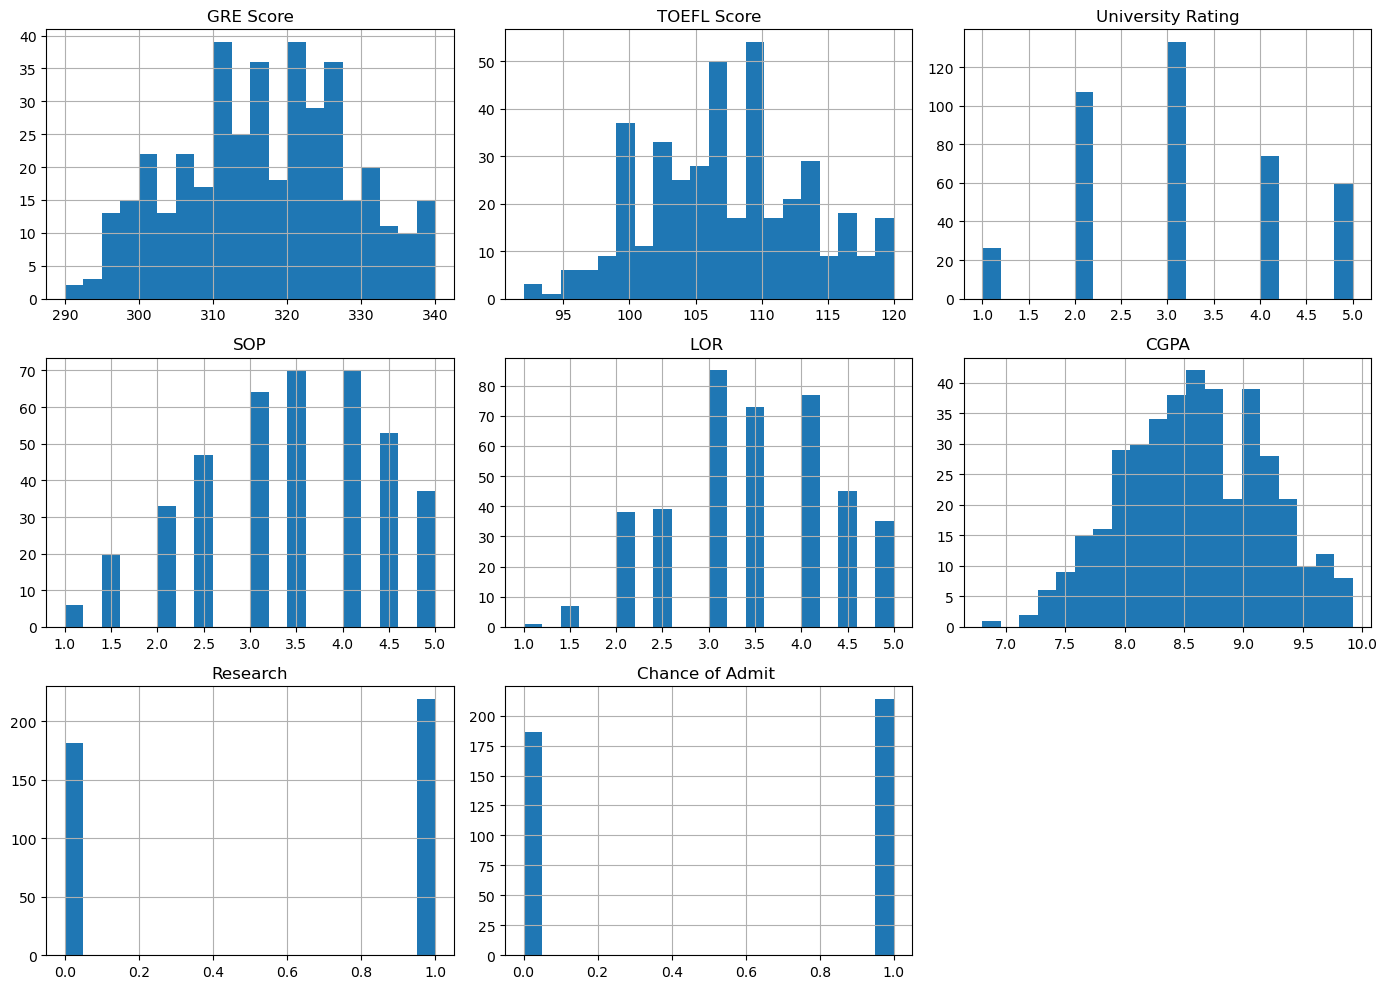

In [25]:
# Plot histograms for each numerical feature
data.hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


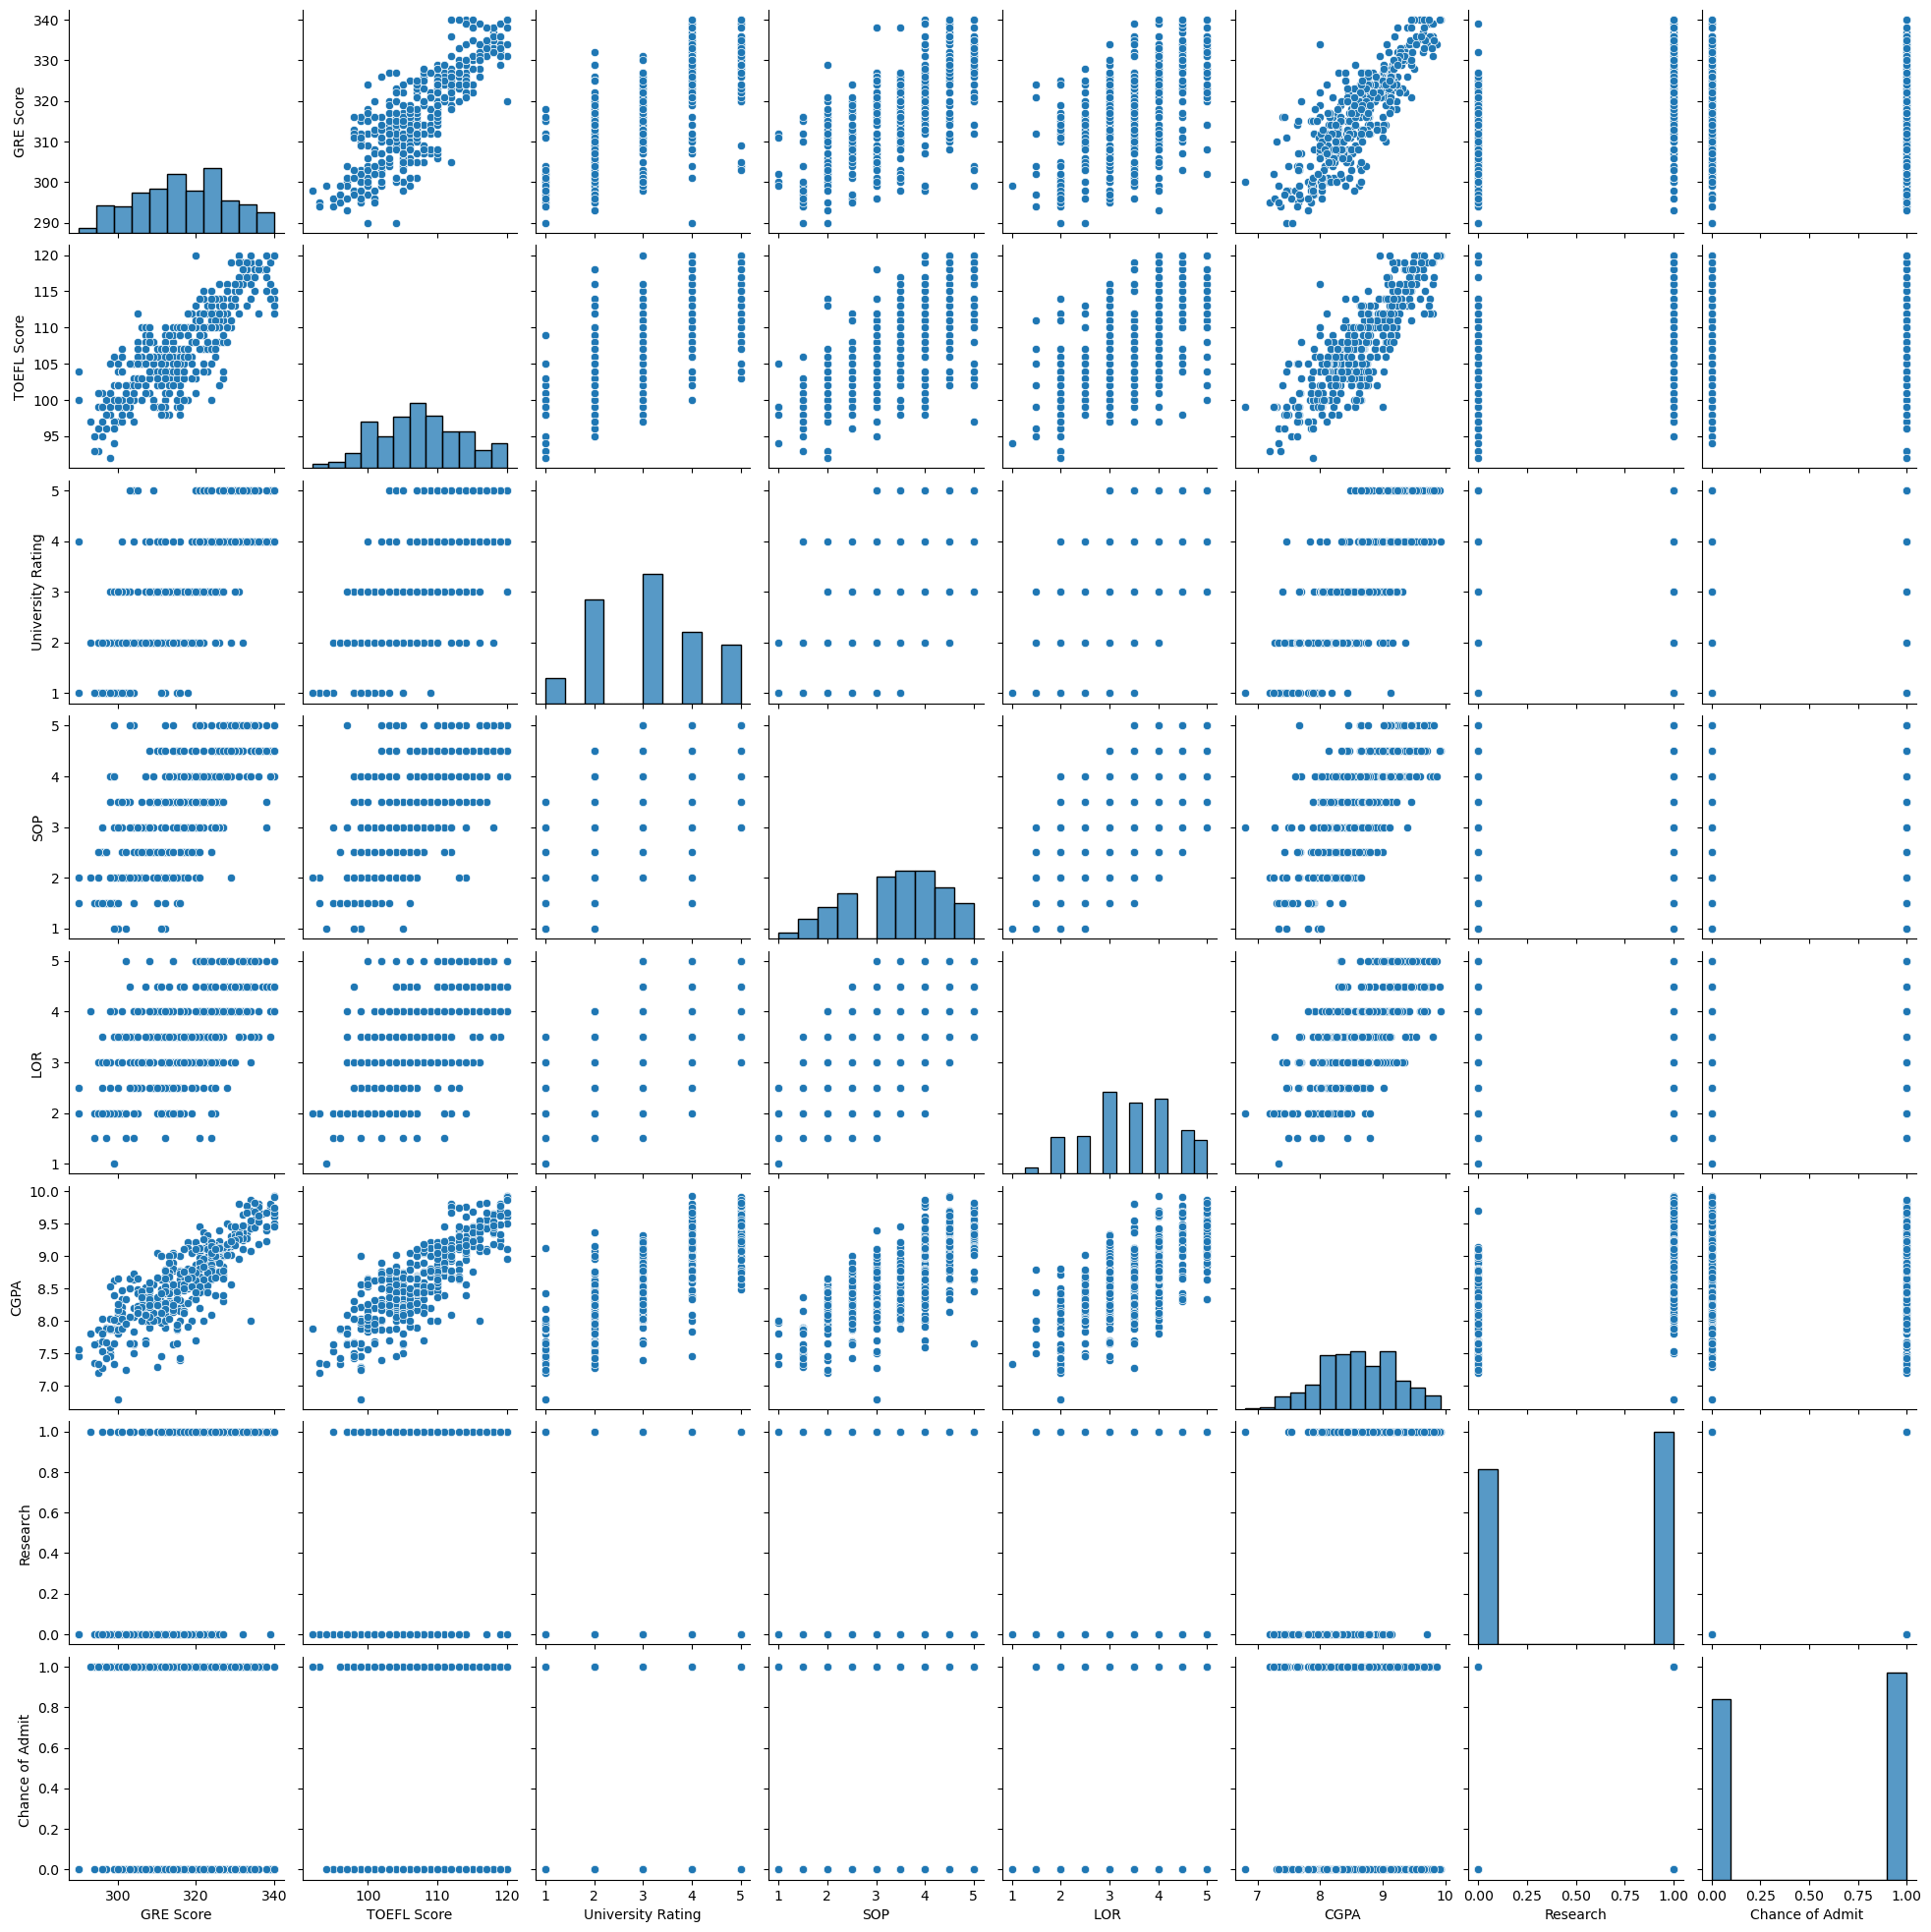

In [27]:
# Plot pairplot to see pairwise relationships
import seaborn as sns
sns.pairplot(data)
plt.show()


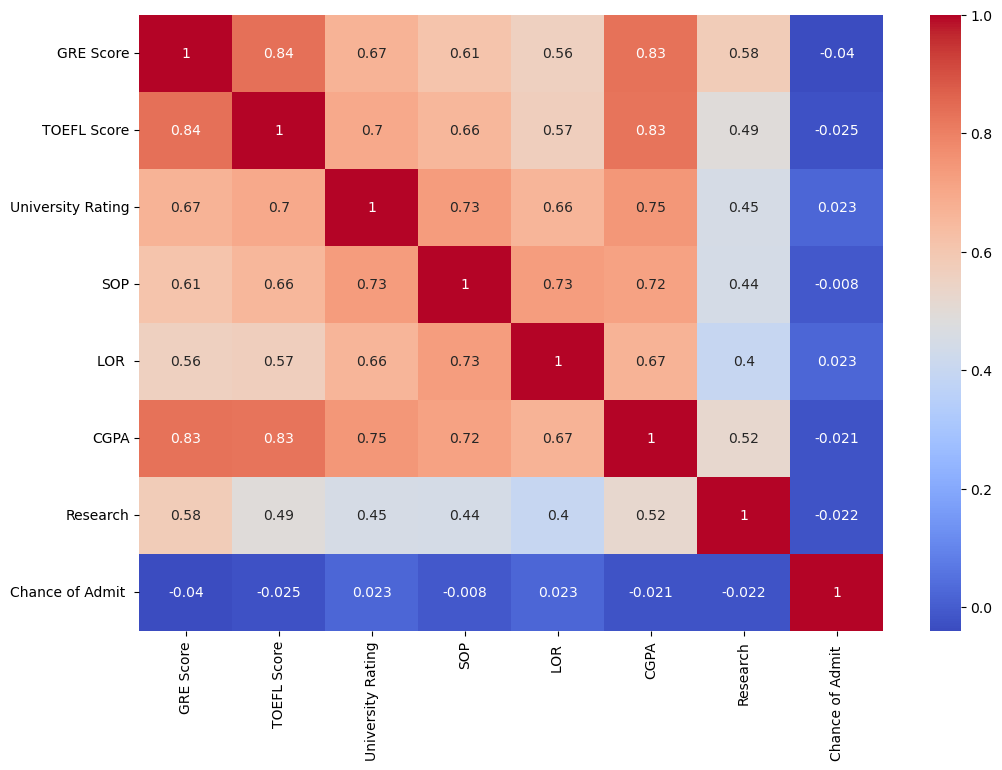

In [28]:
# Plot correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


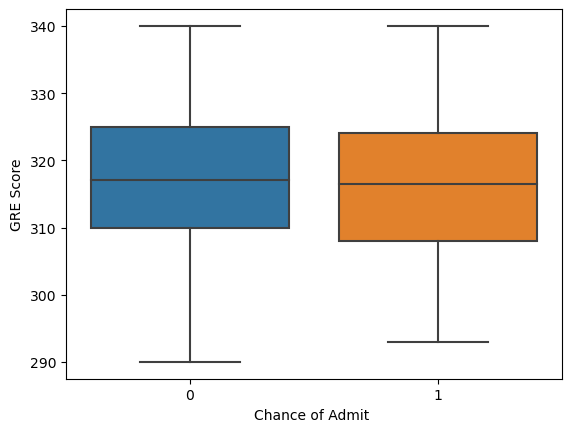

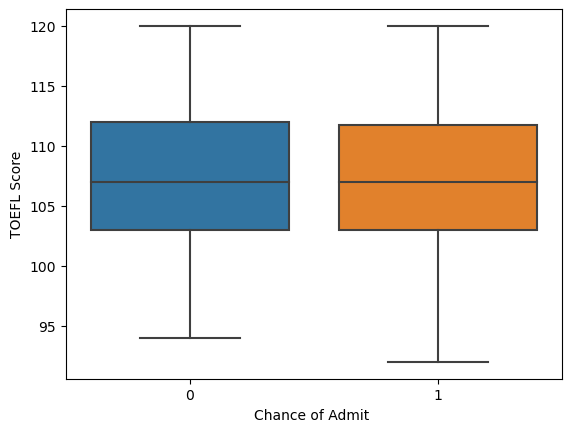

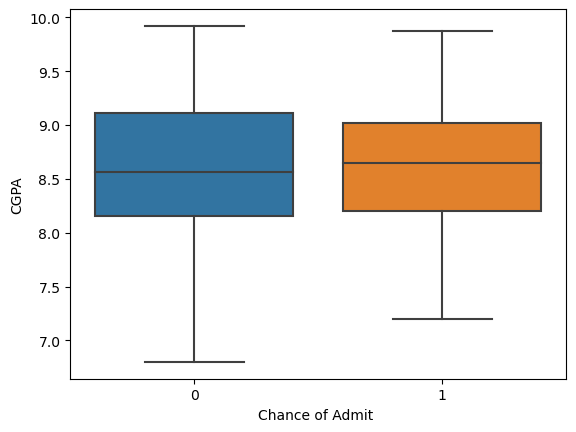

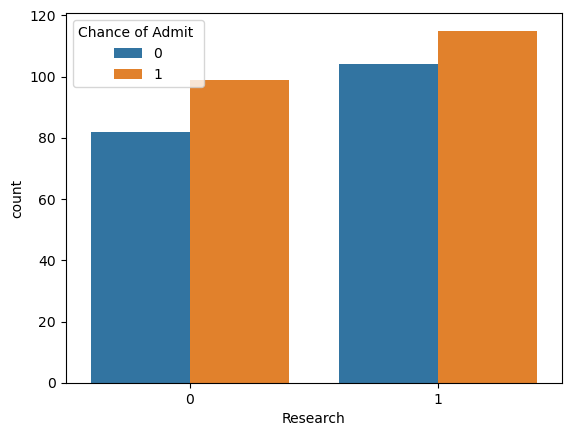

In [29]:
# Visualize relationships between features and the target variable
sns.boxplot(x='Chance of Admit ', y='GRE Score', data=data)
plt.show()

sns.boxplot(x='Chance of Admit ', y='TOEFL Score', data=data)
plt.show()

sns.boxplot(x='Chance of Admit ', y='CGPA', data=data)
plt.show()

sns.countplot(x='Research', hue='Chance of Admit ', data=data)
plt.show()


In [30]:
# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Model")
print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", class_report_log_reg)


Logistic Regression Model
Accuracy: 0.425
Confusion Matrix:
 [[ 8 35]
 [11 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.43      0.70      0.53        37

    accuracy                           0.42        80
   macro avg       0.42      0.44      0.39        80
weighted avg       0.42      0.42      0.38        80



In [31]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print("Naïve Bayes Model")
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", class_report_nb)


Naïve Bayes Model
Accuracy: 0.4
Confusion Matrix:
 [[ 9 34]
 [14 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.21      0.27        43
           1       0.40      0.62      0.49        37

    accuracy                           0.40        80
   macro avg       0.40      0.42      0.38        80
weighted avg       0.40      0.40      0.37        80



In [20]:
print("Comparative Analysis:")
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Naïve Bayes Accuracy:", accuracy_nb)

print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_log_reg)
print("\nNaïve Bayes Confusion Matrix:\n", conf_matrix_nb)

print("\nLogistic Regression Classification Report:\n", class_report_log_reg)
print("\nNaïve Bayes Classification Report:\n", class_report_nb)


Comparative Analysis:
Logistic Regression Accuracy: 0.425
Naïve Bayes Accuracy: 0.4

Logistic Regression Confusion Matrix:
 [[ 8 35]
 [11 26]]

Naïve Bayes Confusion Matrix:
 [[ 9 34]
 [14 23]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.19      0.26        43
           1       0.43      0.70      0.53        37

    accuracy                           0.42        80
   macro avg       0.42      0.44      0.39        80
weighted avg       0.42      0.42      0.38        80


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.21      0.27        43
           1       0.40      0.62      0.49        37

    accuracy                           0.40        80
   macro avg       0.40      0.42      0.38        80
weighted avg       0.40      0.40      0.37        80

